<a href="https://colab.research.google.com/github/mehrnazeraeisi/Graph/blob/main/GraphDrY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

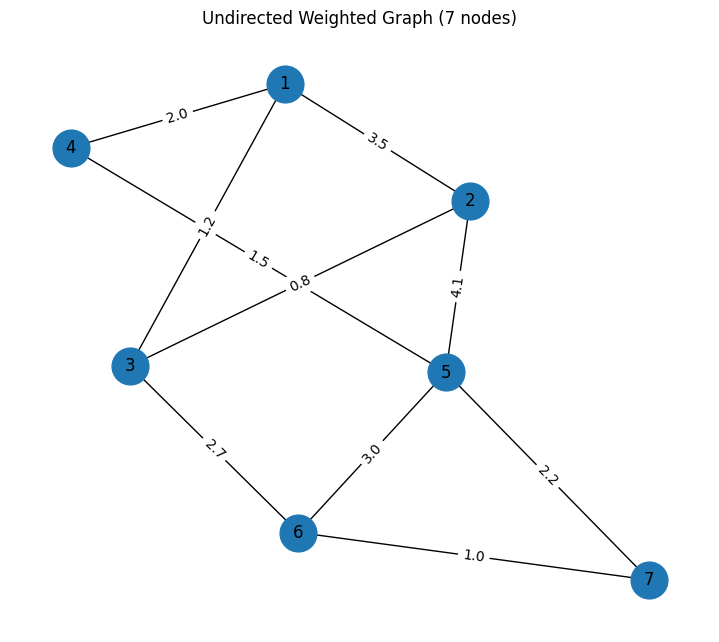

Eigenvalues of Laplacian L (column vector, decimals):
[[-0.    ]
 [ 2.4671]
 [ 3.3632]
 [ 5.354 ]
 [ 7.2223]
 [10.0706]
 [15.5228]]
   Eigenvalue
0     -0.0000
1      2.4671
2      3.3632
3      5.3540
4      7.2223
5     10.0706
6     15.5228

Enter a natural number n to compute L^n: 6

Eigenvalues of L^6 (column vector, decimals):
[[      -0.    ]
 [     225.4799]
 [    1447.0812]
 [   23555.0592]
 [  141918.145 ]
 [ 1043120.077 ]
 [13990339.0717]]
   Eigenvalue L^6
0         -0.0000
1        225.4799
2       1447.0812
3      23555.0592
4     141918.1450
5    1043120.0770
6   13990339.0717

Eigenvalues of L^6_i (after removing node 1):
[[     114.9347]
 [    1438.8314]
 [   14099.6126]
 [  111965.3757]
 [  658164.6993]
 [13234297.711 ]]
   Eigenvalue L^6_1
0          114.9347
1         1438.8314
2        14099.6126
3       111965.3757
4       658164.6993
5     13234297.7110

Eigenvalues of L^6_i (after removing node 2):
[[    196.8807]
 [   1415.1169]
 [   7766.4914]
 [ 131670.7459]


In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- تعریف گراف ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))
edges_with_weights = [
    (1, 2, 3.5),
    (1, 3, 1.2),
    (1, 4, 2.0),
    (2, 3, 0.8),
    (2, 5, 4.1),
    (3, 6, 2.7),
    (4, 5, 1.5),
    (5, 6, 3.0),
    (5, 7, 2.2),
    (6, 7, 1.0)
]
G.add_weighted_edges_from(edges_with_weights)

# --- رسم گراف ---
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7,6))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Undirected Weighted Graph (7 nodes)")
plt.axis('off')
plt.show()

# --- محاسبه لاپلاسین و به توان رساندن ---
L = nx.laplacian_matrix(G).toarray()
np.set_printoptions(precision=4, suppress=True)
pd.options.display.float_format = '{:.4f}'.format

eig_L = np.linalg.eigh(L)[0].reshape(-1,1)
print("Eigenvalues of Laplacian L (column vector, decimals):")
print(eig_L)
print(pd.DataFrame(eig_L, columns=["Eigenvalue"]))

# --- گرفتن عدد طبیعی n از کاربر ---
n = int(input("\nEnter a natural number n to compute L^n: "))

Ln = np.linalg.matrix_power(L, n)
eig_Ln = np.linalg.eigh(Ln)[0].reshape(-1,1)
print(f"\nEigenvalues of L^{n} (column vector, decimals):")
print(eig_Ln)
print(pd.DataFrame(eig_Ln, columns=[f"Eigenvalue L^{n}"]))

# --- حذف سطر و ستون i ام از Ln و محاسبه مقادیر ویژه ---
for i in range(7):  # i=0..6 متناظر با راس 1..7
    Ln_i = np.delete(Ln, i, axis=0)
    Ln_i = np.delete(Ln_i, i, axis=1)

    eig_Ln_i = np.linalg.eigh(Ln_i)[0].reshape(-1,1)

    print(f"\nEigenvalues of L^{n}_i (after removing node {i+1}):")
    print(eig_Ln_i)

    df_Ln_i = pd.DataFrame(eig_Ln_i, columns=[f"Eigenvalue L^{n}_{i+1}"])
    print(df_Ln_i)


Graph created with 10 nodes and 21 edges

Eigenvalues of original Laplacian:
λ_0 = 0.000000
λ_1 = 5.040244
λ_2 = 13.576805
λ_3 = 16.523779
λ_4 = 17.871065
λ_5 = 22.851739
λ_6 = 27.569856
λ_7 = 43.006782
λ_8 = 43.783871
λ_9 = 55.775859

Fourth smallest eigenvalue (λ₃) of original Laplacian: 16.523779

Set S: [np.int64(2), np.int64(3), np.int64(5), np.int64(7)]
Complement T: [np.int64(0), np.int64(1), np.int64(4), np.int64(6), np.int64(8), np.int64(9)]

Computing k-th roots of smallest eigenvalues for different k...
k =  1: (λ_min)^(1/k) = 7.825600
k =  2: (λ_min)^(1/k) = 10.325442
k =  3: (λ_min)^(1/k) = 11.328110
k =  4: (λ_min)^(1/k) = 11.899325
k =  5: (λ_min)^(1/k) = 12.267406
k =  6: (λ_min)^(1/k) = 12.527080
k =  7: (λ_min)^(1/k) = 12.724749
k =  8: (λ_min)^(1/k) = 12.884929
k =  9: (λ_min)^(1/k) = 13.021585
k = 10: (λ_min)^(1/k) = 13.143317
k = 20: (λ_min)^(1/k) = 14.172823
k = 30: (λ_min)^(1/k) = 15.007687
k = 40: (λ_min)^(1/k) = 0.000000
k = 50: (λ_min)^(1/k) = 0.000000


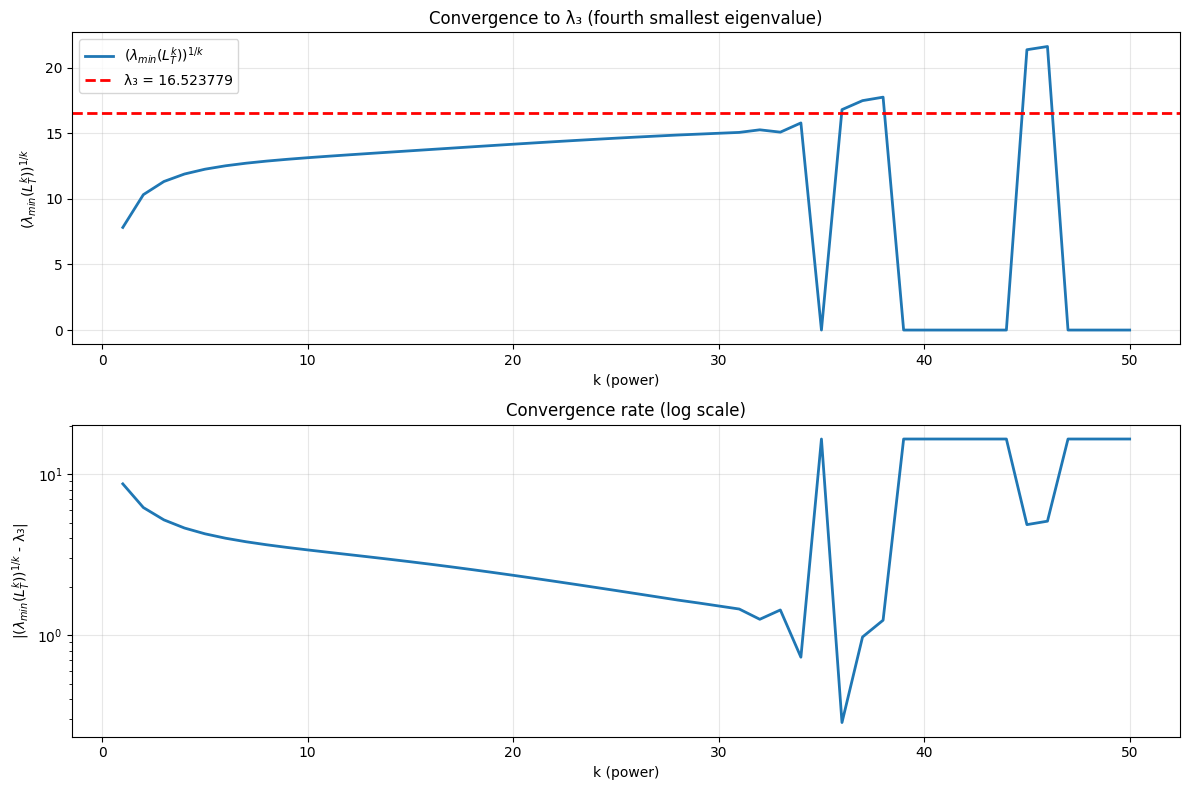


Convergence Analysis:
Final value for k=50: 0.00000000
λ₃: 16.52377878
Absolute error: 16.52377878
Relative error: 1.00000000

Testing with multiple random S sets...

Trial 1: S = [np.int64(1), np.int64(2), np.int64(4), np.int64(5)], T = [np.int64(0), np.int64(3), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Final value: 0.00000000
λ₃: 16.52377878
Absolute error: 16.52377878

Trial 2: S = [np.int64(1), np.int64(3), np.int64(4), np.int64(5)], T = [np.int64(0), np.int64(2), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Final value: 0.00000000
λ₃: 16.52377878
Absolute error: 16.52377878

Trial 3: S = [np.int64(1), np.int64(2), np.int64(4), np.int64(5)], T = [np.int64(0), np.int64(3), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Final value: 0.00000000
λ₃: 16.52377878
Absolute error: 16.52377878

Theoretical Explanation:
Let L have eigenvalues: 0 = λ_0 < λ_1 ≤ λ_2 ≤ λ_3 ≤ ...
Then L^k has eigenvalues: 0 = λ_0^k < λ_1^k ≤ λ_2^k ≤ λ_3^k ≤ ...
When we restrict L^k to T (c

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Set random seed for reproducibility
np.random.seed(42)

# Create a random connected weighted graph with 10 nodes
n = 10

# If nx.random_tree isn't available in this NetworkX version, build a simple random tree:
def generate_random_tree(num_nodes):
    """
    Simple random tree generator:
    Start with node 0, then for each new node i (1..n-1) connect it to a random previous node.
    This produces a random labeled tree (equivalent to a simple random tree construction).
    """
    T = nx.Graph()
    T.add_nodes_from(range(num_nodes))
    for i in range(1, num_nodes):
        j = np.random.randint(0, i)  # connect i to random node among 0..i-1
        T.add_edge(i, j)
    return T

# Use generator (this is robust across NetworkX versions)
G = generate_random_tree(n)

# Add random natural weights (1 to 10) to edges of the tree
for (u, v) in G.edges():
    G[u][v]['weight'] = np.random.randint(1, 11)

# Add some additional random edges (avoid duplicate edges)
for i in range(n):
    for j in range(i+1, n):
        if not G.has_edge(i, j) and np.random.random() < 0.3:
            G.add_edge(i, j, weight=np.random.randint(1, 11))

print("Graph created with", n, "nodes and", G.number_of_edges(), "edges")

# Create Laplacian matrix
A = nx.to_numpy_array(G, nodelist=range(n), weight='weight')
D = np.diag(np.sum(A, axis=1))
L = D - A

# Compute eigenvalues of original Laplacian using eigh (guarantees real sorted eigenvalues)
eigvals_all, eigvecs_all = eigh(L)
sorted_eigenvalues = eigvals_all  # eigh returns ascending eigenvalues
lambda_3 = sorted_eigenvalues[3]  # Fourth smallest eigenvalue (index 3)

print(f"\nEigenvalues of original Laplacian:")
for i, val in enumerate(sorted_eigenvalues):
    print(f"λ_{i} = {val:.6f}")

print(f"\nFourth smallest eigenvalue (λ₃) of original Laplacian: {lambda_3:.6f}")

# Randomly select set S with 4 nodes
all_nodes = np.arange(n)
S = np.random.choice(all_nodes, size=4, replace=False)
T = np.setdiff1d(all_nodes, S)  # Complement of S

print(f"\nSet S: {sorted(list(S))}")
print(f"Complement T: {sorted(list(T))}")

# Use eigvals_all and eigvecs_all from above
eigvals = eigvals_all
eigvecs = eigvecs_all

# Function to compute k-th root of smallest eigenvalue of L^k restricted to T
def kth_root_smallest_eig_Lk_restricted(k):
    # Build Lambda^k and L^k via spectral decomposition
    Lambda_k = np.diag(eigvals ** k)
    L_k = eigvecs @ Lambda_k @ eigvecs.T

    # Extract submatrix for T
    L_k_T = L_k[np.ix_(T, T)]

    # Compute eigenvalues of the restricted matrix
    eigvals_T = np.linalg.eigvals(L_k_T)
    # numerical issues: take real part and guard against tiny negative numerical noise
    eigvals_T_real = np.real(eigvals_T)
    smallest_eig = np.min(eigvals_T_real)
    smallest_eig = max(smallest_eig, 0.0)  # avoid negative due to round-off

    # If smallest_eig is zero, k-th root is zero; otherwise take k-th root
    return smallest_eig ** (1.0 / k)

# Test for different k values
k_values = np.arange(1, 51)  # k from 1 to 50
kth_root_smallest_eigs = []

print("\nComputing k-th roots of smallest eigenvalues for different k...")
for k in k_values:
    eig_val = kth_root_smallest_eig_Lk_restricted(k)
    kth_root_smallest_eigs.append(eig_val)
    if k <= 10 or k % 10 == 0:
        print(f"k = {k:2d}: (λ_min)^(1/k) = {eig_val:.6f}")

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(k_values, kth_root_smallest_eigs, linewidth=2, label='$(λ_{min}(L^k_T))^{1/k}$')
plt.axhline(y=lambda_3, color='r', linestyle='--', linewidth=2,
            label=f'λ₃ = {lambda_3:.6f}')
plt.xlabel('k (power)')
plt.ylabel('$(λ_{min}(L^k_T))^{1/k}$')
plt.title('Convergence to λ₃ (fourth smallest eigenvalue)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot the difference to show convergence
plt.subplot(2, 1, 2)
differences = np.abs(np.array(kth_root_smallest_eigs) - lambda_3)
# avoid zeros in semilogy by clipping
differences_clipped = np.clip(differences, 1e-16, None)
plt.semilogy(k_values, differences_clipped, linewidth=2)
plt.xlabel('k (power)')
plt.ylabel('|$(λ_{min}(L^k_T))^{1/k}$ - λ₃|')
plt.title('Convergence rate (log scale)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: check if the sequence indeed converges to λ₃
final_value = kth_root_smallest_eigs[-1]
convergence_error = np.abs(final_value - lambda_3)

print(f"\nConvergence Analysis:")
print(f"Final value for k={k_values[-1]}: {final_value:.8f}")
print(f"λ₃: {lambda_3:.8f}")
print(f"Absolute error: {convergence_error:.8f}")
print(f"Relative error: {convergence_error/np.abs(lambda_3):.8f}")

# Test with multiple random S sets to verify the pattern
print("\n" + "="*60)
print("Testing with multiple random S sets...")
print("="*60)

for trial in range(3):
    S_new = np.random.choice(all_nodes, size=4, replace=False)
    T_new = np.setdiff1d(all_nodes, S_new)

    print(f"\nTrial {trial+1}: S = {sorted(list(S_new))}, T = {sorted(list(T_new))}")

    kth_root_smallest_eigs_new = []
    for k in k_values:
        Lambda_k = np.diag(eigvals ** k)
        L_k = eigvecs @ Lambda_k @ eigvecs.T
        L_k_T = L_k[np.ix_(T_new, T_new)]
        eigvals_T = np.linalg.eigvals(L_k_T)
        eigvals_T_real = np.real(eigvals_T)
        smallest_eig = np.min(eigvals_T_real)
        smallest_eig = max(smallest_eig, 0.0)
        kth_root_smallest_eigs_new.append(smallest_eig ** (1.0 / k))

    final_val_new = kth_root_smallest_eigs_new[-1]
    error_new = np.abs(final_val_new - lambda_3)

    print(f"Final value: {final_val_new:.8f}")
    print(f"λ₃: {lambda_3:.8f}")
    print(f"Absolute error: {error_new:.8f}")

# Theoretical explanation
print("\n" + "="*60)
print("Theoretical Explanation:")
print("="*60)
print("Let L have eigenvalues: 0 = λ_0 < λ_1 ≤ λ_2 ≤ λ_3 ≤ ...")
print("Then L^k has eigenvalues: 0 = λ_0^k < λ_1^k ≤ λ_2^k ≤ λ_3^k ≤ ...")
print("When we restrict L^k to T (complement of S), small-index eigenvectors")
print("that are 'removed' by the restriction may no longer appear, and for large k")
print("the largest among the remaining base eigenvalues (here λ_3) dominates.")
print("So (λ_min(L^k_T))^(1/k) tends to λ_3 in many cases (up to numerical effects).")
